In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib
import scipy
from scipy.signal import find_peaks
import pandas as pd
from skimage.feature import peak_local_max

all_data={}
my_array=np.zeros((250,250,400))
stds=np.zeros((250,250,400))
data03=pd.read_csv("D:Desktop/thesis/results/new_dosetomedium__clear_SFRT_waterphantom200MeV__1.csv",delimiter= ',',comment='#',names=['x','y','z','dose','stderror'],dtype={'x':int,'y':int,'z':int,'dose':float,'stderror':float})
data03.stderror=data03.stderror/np.sqrt(500000)
data03.stderror=1/((data03.stderror/(1.60218e-19)*(8.2*10**-9))**2)
for i in np.arange(2,21):
    data1=pd.read_csv("D:Desktop/thesis/results/new_dosetomedium__clear_SFRT_waterphantom200MeV__"+str(i)+".csv",delimiter= ',',comment='#',names=['x','y','z','dose','stderror'],dtype={'x':int,'y':int,'z':int,'dose':float,'stderror':float})
    data03.dose=data03.dose + data1.dose
    data03.stderror=data03.stderror +  (1/(data1.stderror/np.sqrt(500000)/(1.60218e-19)*(8.2*10**-9))**2)
data03.dose=data03.dose/(1.60218e-19)*(8.2*10**-9)/20
data03.stderror=np.sqrt(1/data03.stderror)
for i in np.arange(0,len(data03.dose)):
    my_array[data03.x[i]][data03.y[i]][data03.z[i]]=data03.dose[i]
    stds[data03.x[i]][data03.y[i]][data03.z[i]]=data03.stderror[i]
all_data[200]=np.array(my_array)
all_data['std']=np.array(stds)

GRID= all_data[200]
GRID=GRID.T
GRID_std=all_data['std']
GRID_std=GRID_std.T

In [3]:
all_data={}
my_array=np.zeros((250,250,400))
stds=np.zeros((250,250,400))
data03=pd.read_csv("D:Desktop/thesis/results/new_gammaprimary_clear_SFRT_waterphantom200MeV__1.csv",delimiter= ',',comment='#',names=['x','y','z','dose','stderror'],dtype={'x':int,'y':int,'z':int,'dose':float,'stderror':float})
data03.stderror=data03.stderror/np.sqrt(500000)
for i in np.arange(2,21):
    data1=pd.read_csv("D:Desktop/thesis/results/new_gammaprimary_clear_SFRT_waterphantom200MeV__"+str(i)+".csv",delimiter= ',',comment='#',names=['x','y','z','dose','stderror'],dtype={'x':int,'y':int,'z':int,'dose':float,'stderror':float})
    data03.dose=data03.dose + data1.dose
    data03.stderror=np.sqrt(data03.stderror**2+(data1.stderror/500000)**2)
data03.dose=data03.dose/(1.60218e-19)*(8.2*10**-9)/20
data03.stderror=data03.stderror/(1.60218e-19)*(8.2*10**-9)
for i in np.arange(0,len(data03.dose)):
    my_array[data03.x[i]][data03.y[i]][data03.z[i]]=data03.dose[i]
    stds[data03.x[i]][data03.y[i]][data03.z[i]]=data03.stderror[i]
all_data[200]=np.array(my_array)
all_data['std']=np.array(stds)

GRID_photon=all_data[200]
GRID_photon=GRID_photon.T
GRID_photon_std=all_data['std']
GRID_photon_std=GRID_photon_std.T

[14.25767727456092, 7.44681802736963, 5.054853223101159, 10.983332426053332, 6.558224565774619, 17.05771232230547, 17.542455196300736, 18.840057567904193, 19.729304943460253, 17.694318415920986, 21.574346784293535] [32.65799876065859, 32.80772922296118, 32.563876468915225, 32.1154783243123, 29.86888037797958, 25.807485622892067, 24.842063873105218, 21.982973666758934, 22.189129520008894, 21.382713568605883, 22.169081722304266] [21.46002219349539, 27.40144709783315, 28.973595996912294, 23.73953830691805, 24.946717572391982, 10.549230730875585, 8.85256612258118, 3.872496707947195, 3.064411706932434, 4.481337231764556, 0.7583423454248391]
14.249009158822258 27.126128284409287 14.372700546643332


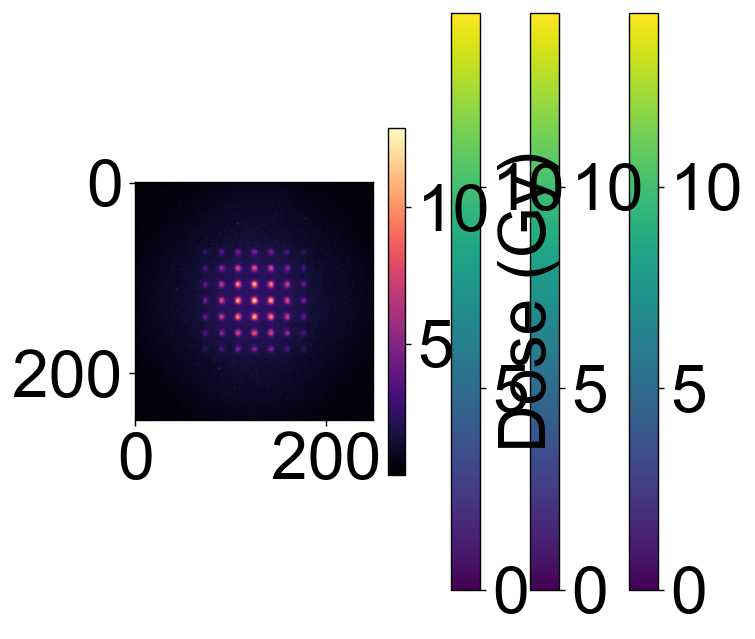

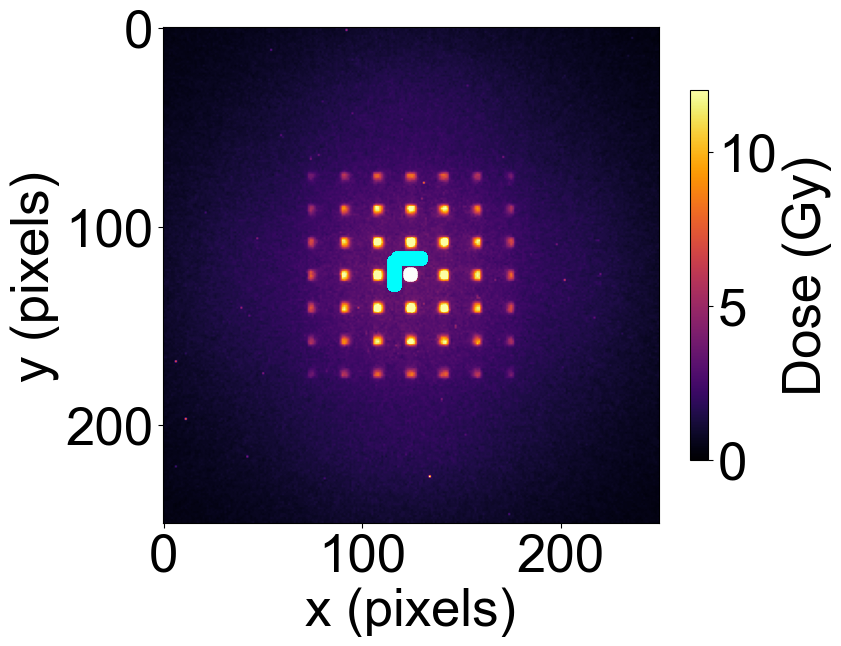

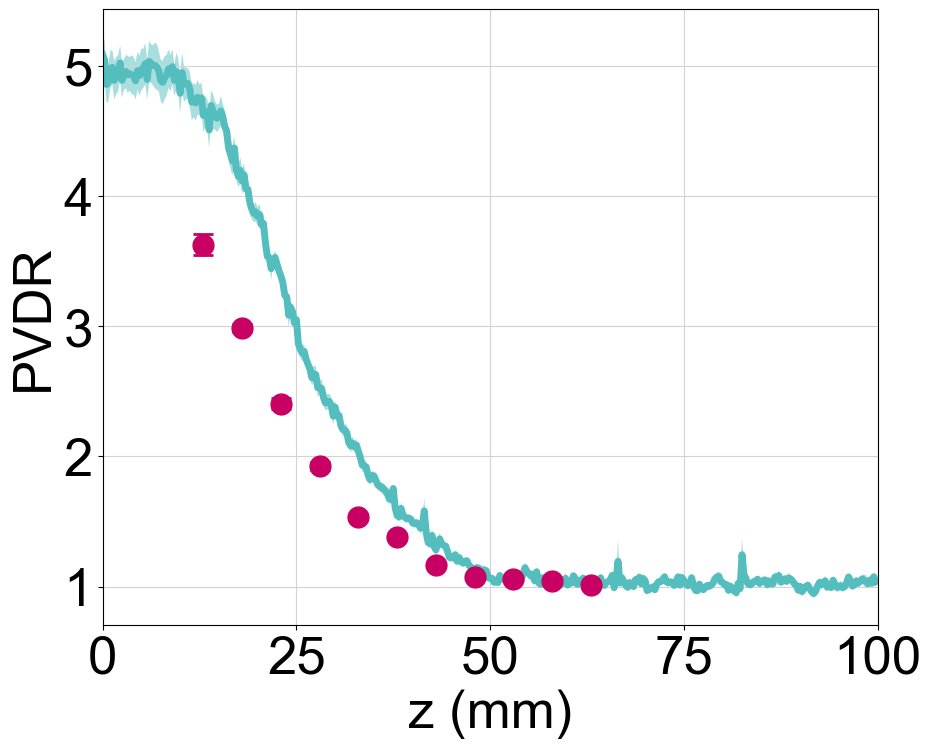

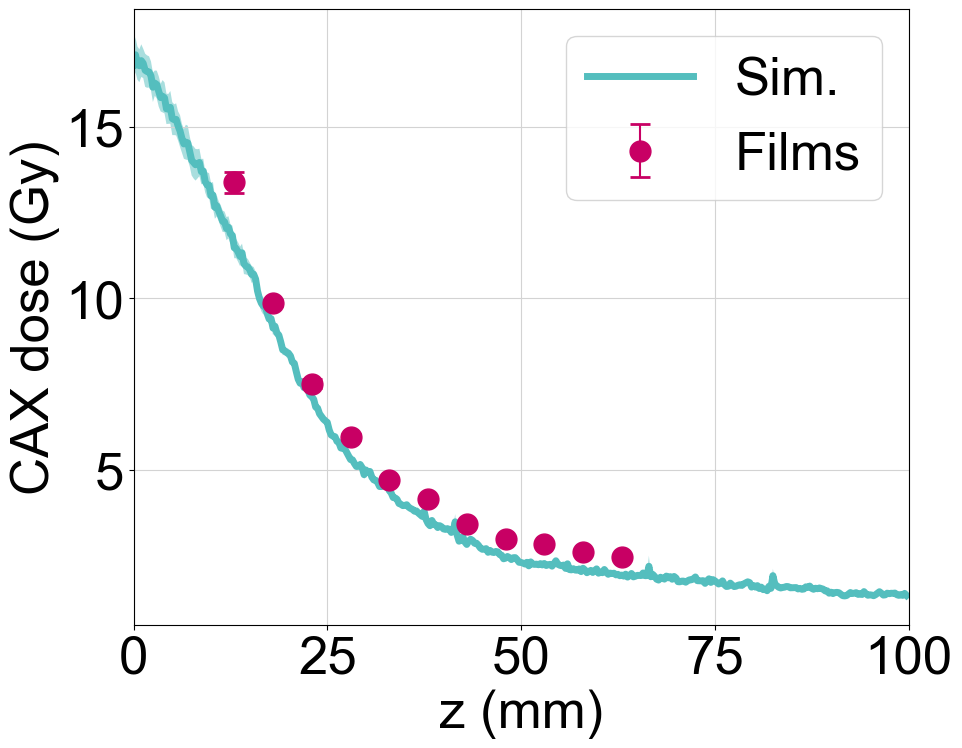

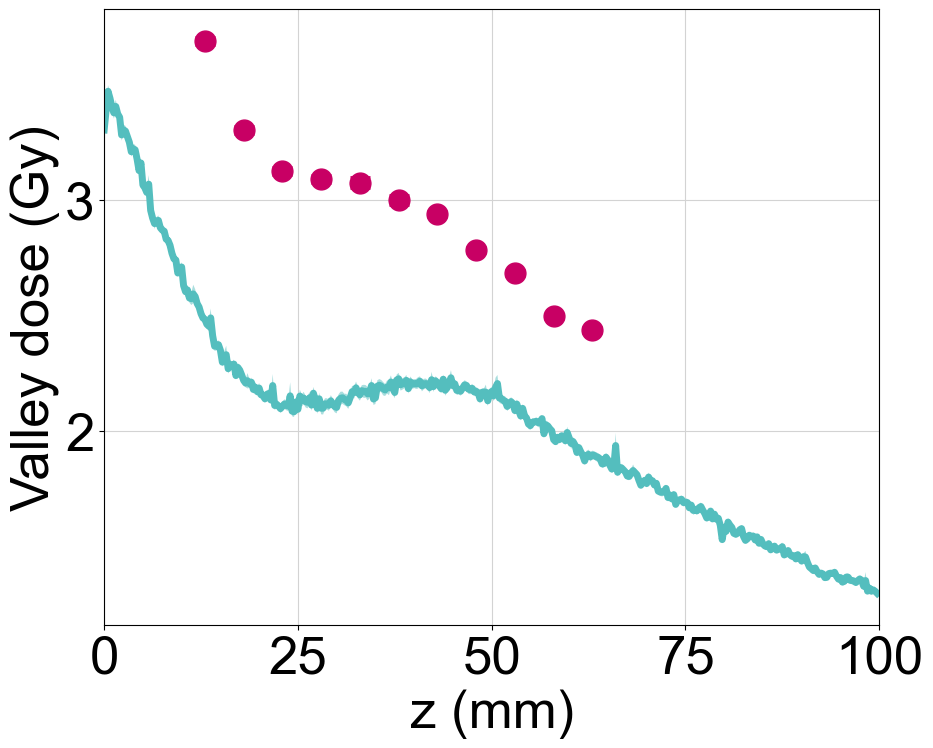

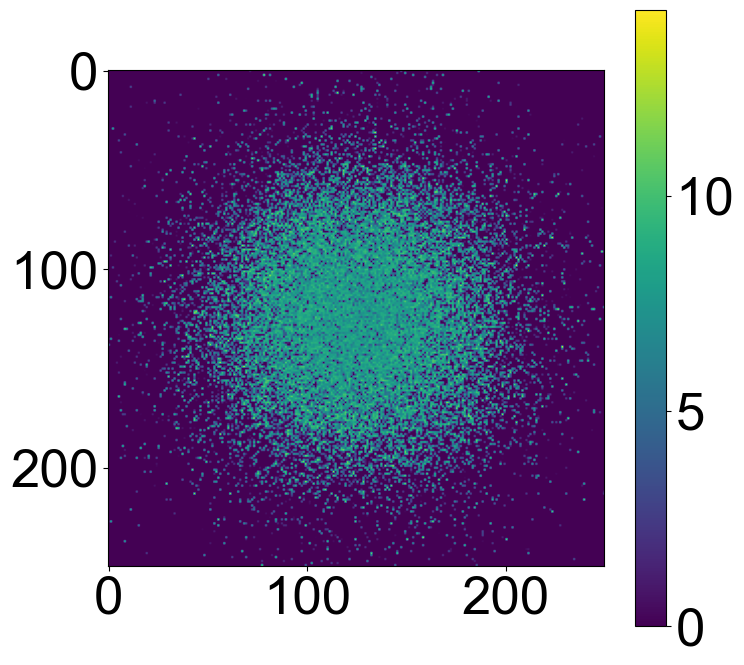

In [55]:
%matplotlib inline
#matplotlib.rc('font', **font)
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=["#54bebe","#c80064"])

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 38}

matplotlib.rc('font', **font)

E=200
x=np.arange(0,250)*0.1
y=np.arange(0,250)*0.1
z=(np.arange(0,400)*0.25)


figure(1,figsize=(8,8))
plt.imshow(GRID[52],cmap='magma')
plt.colorbar(shrink=0.6,label='Dose (Gy)')


peaks=[]
peaks_std=[]
valleys=[]
valleys_std=[]
#Find peak indices
xy = [124,124]
for k in range(len(GRID)):
    #plot 2d profiles
    if k==0:
        figure(k+30,figsize=(8,8))
        profile=GRID[k,xy[1]-100:xy[1]+100,xy[0]-100:xy[0]+100]
        plt.imshow(GRID[k],vmin=0,vmax=12,cmap='inferno')#,extent=(0,len(profile)/300*25.4,0,len(profile)/300*25.4))
        plt.colorbar(shrink=0.6,label='Dose (Gy)')
        for i in np.arange(0,len(np.array([(i,j) for i in np.arange(xy[1]-1,xy[1]+2) for j in np.arange(xy[0]-1,xy[0]+2)]).T[0])):
            plt.scatter(np.array([(i,j) for i in np.arange(xy[1]-1,xy[1]+2) for j in np.arange(xy[0]-1,xy[0]+2)]).T[1],np.array([(i,j) for i in np.arange(xy[1]-1,xy[1]+2) for j in np.arange(xy[0]-1,xy[0]+2)]).T[0],alpha=0.4,c='white')
        plt.xlabel('x (pixels)')
        plt.ylabel('y (pixels)')
        for i in np.arange(0,len(np.array([(i,j) for i in np.arange(xy[1]-7,xy[1]+7) for j in np.arange(xy[0]-9,xy[0]-6)]).T[0])):
            plt.scatter(np.array([(i,j) for i in np.arange(xy[1]-7,xy[1]+7) for j in np.arange(xy[0]-9,xy[0]-6)]).T[1],np.array([(i,j) for i in np.arange(xy[1]-7,xy[1]+7) for j in np.arange(xy[0]-9,xy[0]-6)]).T[0],alpha=0.4,c='cyan')
        for i in np.arange(0,len(np.array([(i,j) for i in np.arange(xy[1]-9,xy[1]-6) for j in np.arange(xy[0]-7,xy[0]+7)]).T[0])):
            plt.scatter(np.array([(i,j) for i in np.arange(xy[1]-9,xy[1]-6) for j in np.arange(xy[0]-7,xy[0]+7)]).T[1],np.array([(i,j) for i in np.arange(xy[1]-9,xy[1]-6) for j in np.arange(xy[0]-7,xy[0]+7)]).T[0],alpha=0.4,c='cyan')
    #ROIs for peaks and valleys + error
    peaks.append(np.mean([[GRID[k,i,j] for i in np.arange(xy[1]-1,xy[1]+2) for j in np.arange(xy[0]-1,xy[0]+2)]]))
    peaks_std.append(np.std([GRID[k,i,j] for i in np.arange(xy[1]-1,xy[1]+2) for j in np.arange(xy[0]-1,xy[0]+2)])/np.sqrt(len([GRID[k,i,j] for i in np.arange(xy[1]-1,xy[1]+2) for j in np.arange(xy[0]-1,xy[0]+2)])))
    valleysx=np.array([GRID[k,i,j] for i in np.arange(xy[1]-9,xy[1]-6) for j in np.arange(xy[0]-7,xy[0]+7)]).flatten()
    valleysy=np.array([GRID[k,i,j] for i in np.arange(xy[1]-7,xy[1]+7) for j in np.arange(xy[0]-9,xy[0]-6)]).flatten()
    valleys.append(np.mean(np.array([valleysx,valleysy]).flatten()))
    valleys_std.append(np.std(np.array([valleysx,valleysy]).flatten())/np.sqrt(len(np.array([valleysx,valleysy]).flatten())))
peaks=np.array(peaks)
peaks_std=np.array(peaks_std)
valleys=np.array(valleys)
valleys_std=np.array(valleys_std)

#pvdr
pvdr=peaks/np.array(valleys)
pvdr_std=np.sqrt((np.array(peaks_std)/np.array(peaks))**2+(np.array(valleys_std)/np.array(valleys))**2)*pvdr




gridfilm=np.load('D:Desktop/thesis/'+str(E)+'MeV.npy',allow_pickle=True)
filmlocs=np.arange(13,63+1,5)
figure(2,figsize=(10,8))
plt.plot(z,pvdr,lw=5,label='Simulation')
plt.fill_between(z,pvdr-pvdr_std,pvdr+pvdr_std,alpha=0.5)
plt.errorbar(filmlocs,gridfilm[5],yerr=gridfilm[6],fmt='o',label='Films',markersize=15,capsize=7,capthick=2)
plt.grid(c='lightgray')
plt.xlabel('z (mm)')
plt.ylabel('PVDR')
plt.xlim(0,100)
#plt.legend()
#l4 = plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=2)

figure(3,figsize=(10,8))
plt.plot(z,peaks,lw=5,label='Sim.')
plt.fill_between(z,peaks-peaks_std,peaks+peaks_std,alpha=0.5)
plt.errorbar(filmlocs,gridfilm[1]*(2.73e-8),yerr=gridfilm[2]*(2.73e-8),fmt='o',label='Films',markersize=15,capsize=7,capthick=2)
plt.grid(c='lightgray')
plt.xlabel('z (mm)')
plt.ylabel('CAX dose (Gy)')
plt.legend()
plt.xlim(0,100)

figure(4,figsize=(10,8))
plt.plot(z,valleys,lw=5,label='Simul.')
plt.fill_between(z,valleys-valleys_std,valleys+valleys_std,alpha=0.5)
plt.errorbar(filmlocs,np.array(gridfilm[7])*(2.73e-8),yerr=np.array(gridfilm[8])*(2.73e-8),fmt='o',label='Films',markersize=15,capsize=7,capthick=2)
plt.grid(c='lightgray')
plt.xlabel('z (mm)')
plt.ylabel('Valley dose (Gy)')
#plt.legend()
plt.xlim(0,100)

# np.save('D:Desktop/thesis/grid1d_y1.npy',np.mean(GRID[52,124-100:124+100,123:126],axis=1))
# np.save('D:Desktop/thesis/grid1d_y2.npy',np.mean(GRID[252,124-100:124+100,123:126],axis=1))
# np.save('D:Desktop/thesis/grid1d_x1.npy',np.mean(GRID[52,123:126,124-100:124+100],axis=0))
# np.save('D:Desktop/thesis/grid1d_x2.npy',np.mean(GRID[252,123:126,124-100:124+100],axis=0))

# np.save('D:Desktop/thesis/grid1d_x3.npy',np.mean(GRID[132,123:126,124-100:124+100],axis=0))
# np.save('D:Desktop/thesis/grid1d_y3.npy',np.mean(GRID[132,124-100:124+100,123:126],axis=1))

CAXdiff=[]
valdiff=[]
pvdrdiff=[]
for i in np.arange(0,11):
    CAXdiff.append(np.abs((gridfilm[1][i]*(2.73e-8)-peaks[52+i*20])/(gridfilm[1][i]*(2.73e-8))*100))
    valdiff.append(np.abs((gridfilm[7][i]*(2.73e-8)-valleys[52+i*20])/(gridfilm[7][i]*(2.73e-8))*100))
    pvdrdiff.append(np.abs((gridfilm[5][i]-pvdr[52+i*20])/pvdr[52+i*20]*100))
                    
print(CAXdiff,valdiff,pvdrdiff)
print(np.mean(CAXdiff),np.mean(valdiff),np.mean(pvdrdiff))


figure(69,figsize=(8,8))
plt.imshow(GRID_std[-1]/GRID[-1]*100)
plt.colorbar()

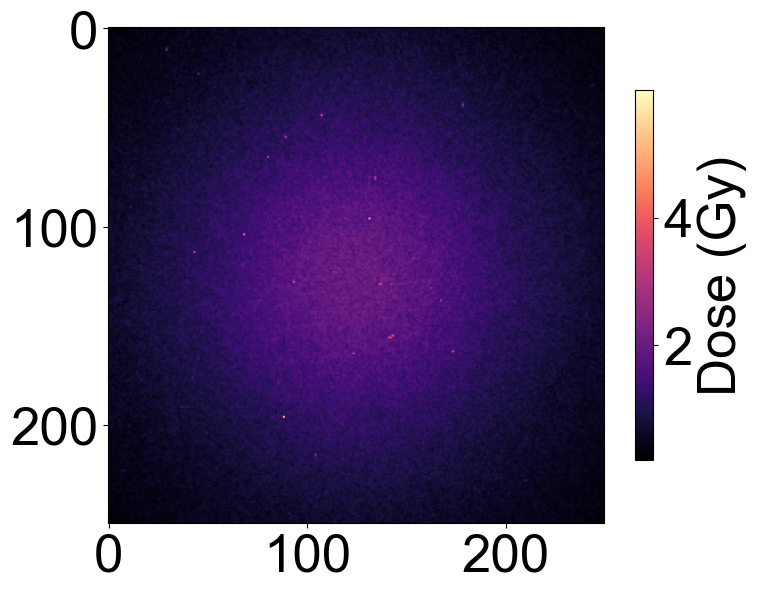

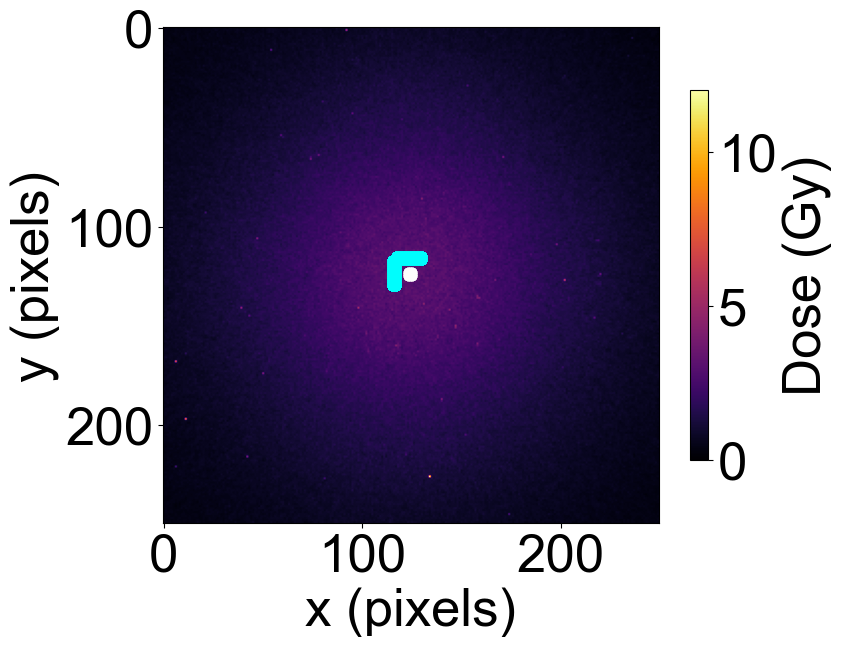

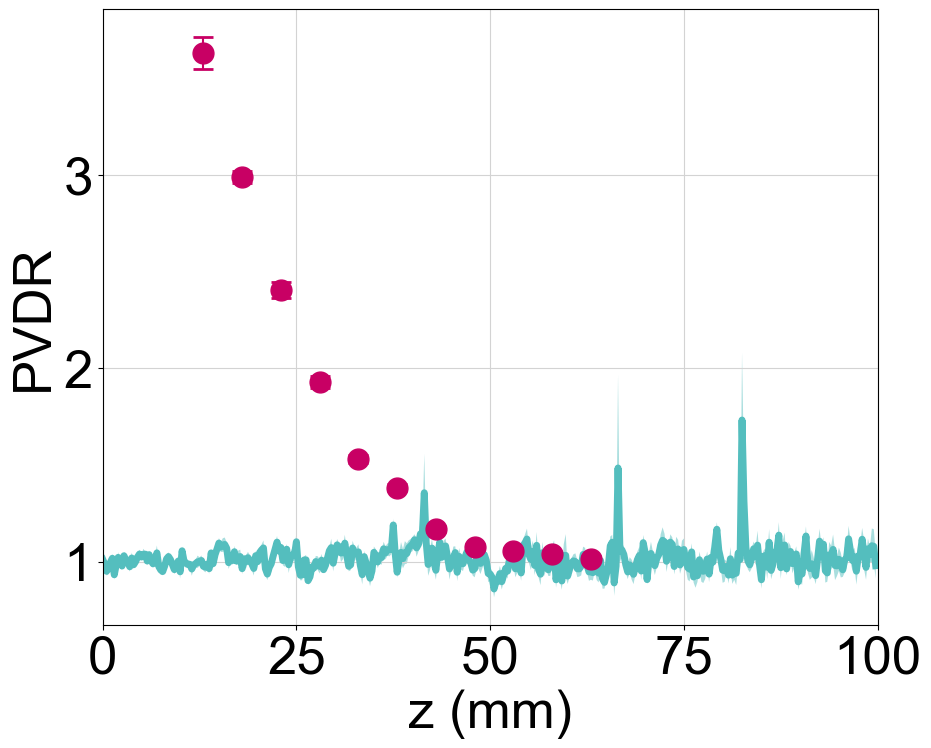

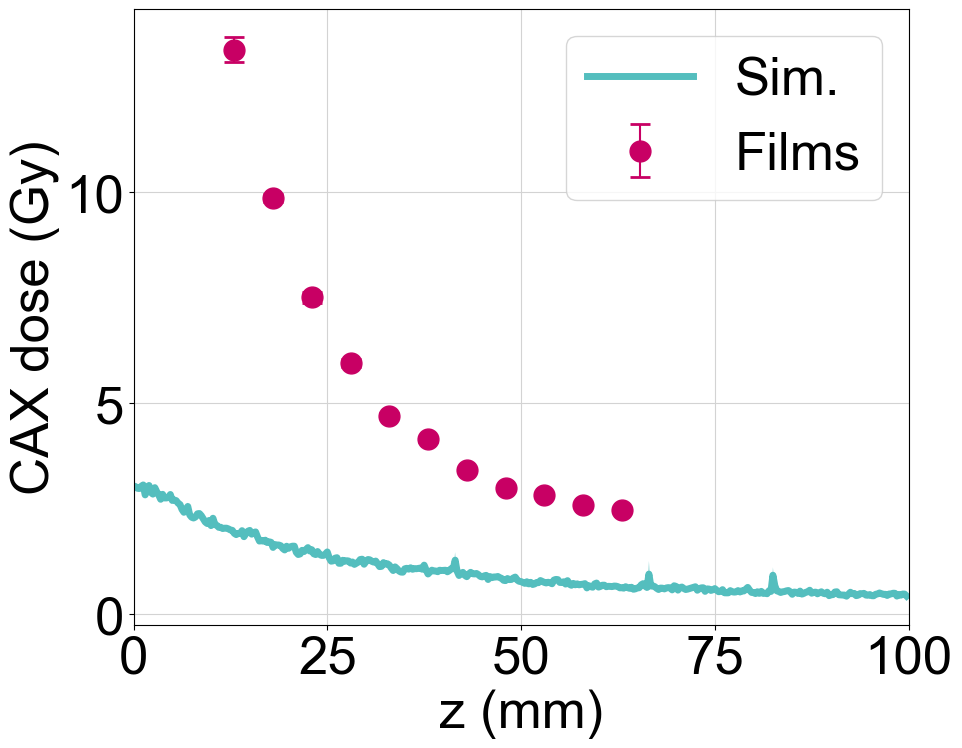

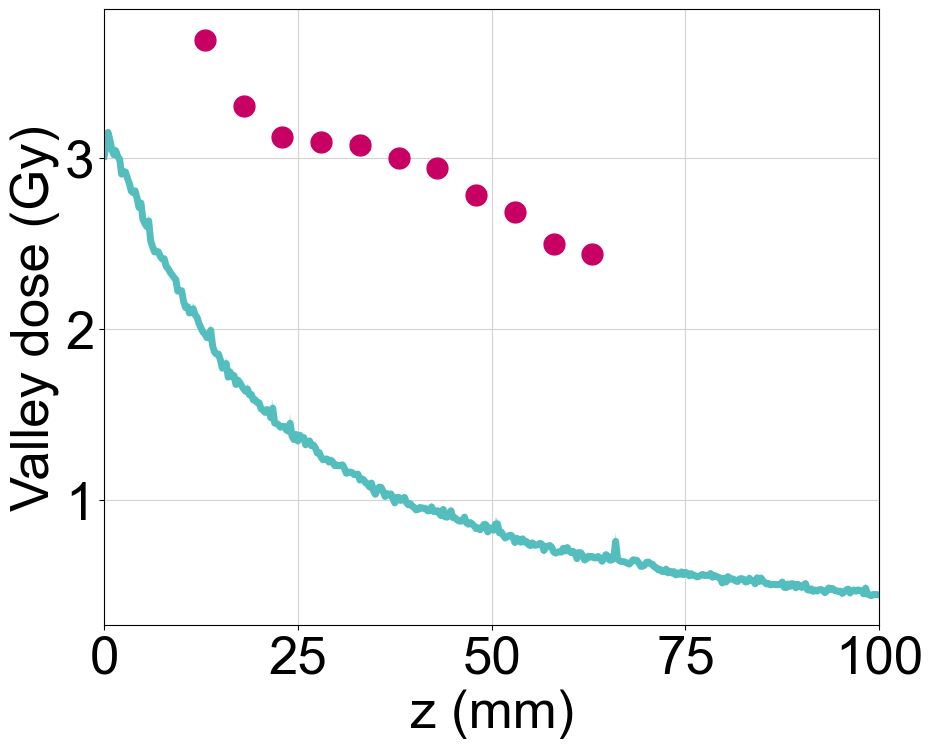

In [7]:
%matplotlib inline
#matplotlib.rc('font', **font)
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=["#54bebe","#c80064"])

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 38}

matplotlib.rc('font', **font)

E=200
x=np.arange(0,250)*0.1
y=np.arange(0,250)*0.1
z=(np.arange(0,400)*0.25)


figure(1,figsize=(8,8))
plt.imshow(GRID_photon[52],cmap='magma')
plt.colorbar(shrink=0.6,label='Dose (Gy)')


peaks=[]
peaks_std=[]
valleys=[]
valleys_std=[]
#Find peak indices
xy = [124,124]
for k in range(len(GRID_photon)):
    #plot 2d profiles
    if k==0:
        figure(k+30,figsize=(8,8))
        profile=GRID_photon[k,xy[1]-100:xy[1]+100,xy[0]-100:xy[0]+100]
        plt.imshow(GRID_photon[k],vmin=0,vmax=12,cmap='inferno')#,extent=(0,len(profile)/300*25.4,0,len(profile)/300*25.4))
        plt.colorbar(shrink=0.6,label='Dose (Gy)')
        for i in np.arange(0,len(np.array([(i,j) for i in np.arange(xy[1]-1,xy[1]+2) for j in np.arange(xy[0]-1,xy[0]+2)]).T[0])):
            plt.scatter(np.array([(i,j) for i in np.arange(xy[1]-1,xy[1]+2) for j in np.arange(xy[0]-1,xy[0]+2)]).T[1],np.array([(i,j) for i in np.arange(xy[1]-1,xy[1]+2) for j in np.arange(xy[0]-1,xy[0]+2)]).T[0],alpha=0.4,c='white')
        plt.xlabel('x (pixels)')
        plt.ylabel('y (pixels)')
        for i in np.arange(0,len(np.array([(i,j) for i in np.arange(xy[1]-7,xy[1]+7) for j in np.arange(xy[0]-9,xy[0]-6)]).T[0])):
            plt.scatter(np.array([(i,j) for i in np.arange(xy[1]-7,xy[1]+7) for j in np.arange(xy[0]-9,xy[0]-6)]).T[1],np.array([(i,j) for i in np.arange(xy[1]-7,xy[1]+7) for j in np.arange(xy[0]-9,xy[0]-6)]).T[0],alpha=0.4,c='cyan')
        for i in np.arange(0,len(np.array([(i,j) for i in np.arange(xy[1]-9,xy[1]-6) for j in np.arange(xy[0]-7,xy[0]+7)]).T[0])):
            plt.scatter(np.array([(i,j) for i in np.arange(xy[1]-9,xy[1]-6) for j in np.arange(xy[0]-7,xy[0]+7)]).T[1],np.array([(i,j) for i in np.arange(xy[1]-9,xy[1]-6) for j in np.arange(xy[0]-7,xy[0]+7)]).T[0],alpha=0.4,c='cyan')
    #ROIs for peaks and valleys + error
    peaks.append(np.mean([[GRID_photon[k,i,j] for i in np.arange(xy[1]-1,xy[1]+2) for j in np.arange(xy[0]-1,xy[0]+2)]]))
    peaks_std.append(np.std([GRID_photon[k,i,j] for i in np.arange(xy[1]-1,xy[1]+2) for j in np.arange(xy[0]-1,xy[0]+2)])/np.sqrt(len([GRID_photon[k,i,j] for i in np.arange(xy[1]-1,xy[1]+2) for j in np.arange(xy[0]-1,xy[0]+2)])))
    valleysx=np.array([GRID_photon[k,i,j] for i in np.arange(xy[1]-9,xy[1]-6) for j in np.arange(xy[0]-7,xy[0]+7)]).flatten()
    valleysy=np.array([GRID_photon[k,i,j] for i in np.arange(xy[1]-7,xy[1]+7) for j in np.arange(xy[0]-9,xy[0]-6)]).flatten()
    valleys.append(np.mean(np.array([valleysx,valleysy]).flatten()))
    valleys_std.append(np.std(np.array([valleysx,valleysy]).flatten())/np.sqrt(len(np.array([valleysx,valleysy]).flatten())))
peaks=np.array(peaks)
peaks_std=np.array(peaks_std)
valleys=np.array(valleys)
valleys_std=np.array(valleys_std)

#pvdr
pvdr=peaks/np.array(valleys)
pvdr_std=np.sqrt((np.array(peaks_std)/np.array(peaks))**2+(np.array(valleys_std)/np.array(valleys))**2)*pvdr




gridfilm=np.load('D:Desktop/thesis/'+str(E)+'MeV.npy',allow_pickle=True)
filmlocs=np.arange(13,63+1,5)
figure(2,figsize=(10,8))
plt.plot(z,pvdr,lw=5,label='Simulation')
plt.fill_between(z,pvdr-pvdr_std,pvdr+pvdr_std,alpha=0.5)
plt.errorbar(filmlocs,gridfilm[5],yerr=gridfilm[6],fmt='o',label='Films',markersize=15,capsize=7,capthick=2)
plt.grid(c='lightgray')
plt.xlabel('z (mm)')
plt.ylabel('PVDR')
plt.xlim(0,100)
#plt.legend()
#l4 = plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=2)

figure(3,figsize=(10,8))
plt.plot(z,peaks,lw=5,label='Sim.')
plt.fill_between(z,peaks-peaks_std,peaks+peaks_std,alpha=0.5)
plt.errorbar(filmlocs,gridfilm[1]*(2.73e-8),yerr=gridfilm[2]*(2.73e-8),fmt='o',label='Films',markersize=15,capsize=7,capthick=2)
plt.grid(c='lightgray')
plt.xlabel('z (mm)')
plt.ylabel('CAX dose (Gy)')
plt.legend()
plt.xlim(0,100)

figure(4,figsize=(10,8))
plt.plot(z,valleys,lw=5,label='Simul.')
plt.fill_between(z,valleys-valleys_std,valleys+valleys_std,alpha=0.5)
plt.errorbar(filmlocs,np.array(gridfilm[7])*(2.73e-8),yerr=np.array(gridfilm[8])*(2.73e-8),fmt='o',label='Films',markersize=15,capsize=7,capthick=2)
plt.grid(c='lightgray')
plt.xlabel('z (mm)')
plt.ylabel('Valley dose (Gy)')
#plt.legend()
plt.xlim(0,100)

photon_peaks=peaks
photon_valleys=valleys

27.834937376550467
51.16236279166009
1.8214285714285714
79.36073938660736
35.33891488905985


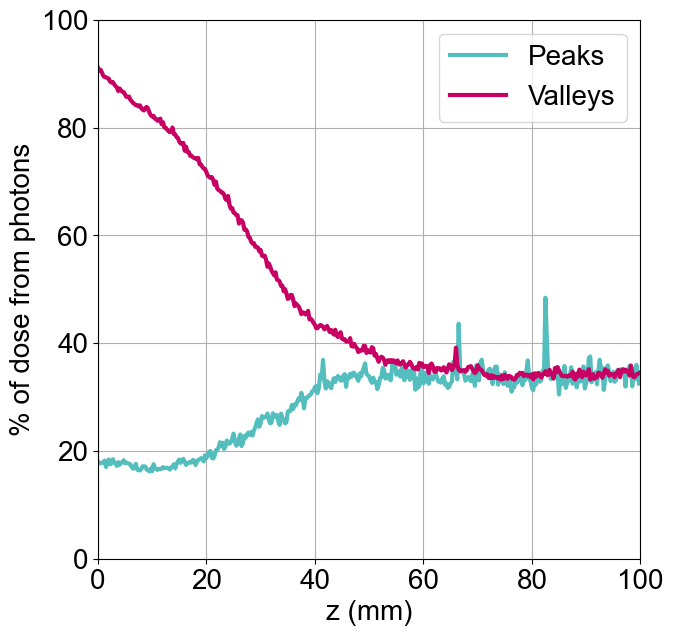

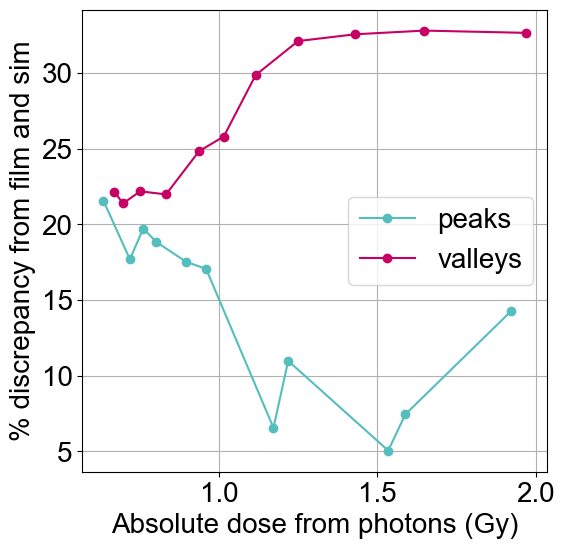

In [22]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

figure(1,figsize=(7,7))
plt.plot(z,photon_peaks/peaks*100,lw=3,label='Peaks')
plt.plot(z,photon_valleys/valleys*100,lw=3,label='Valleys')
plt.grid()
plt.ylim(0,100)
plt.xlim(0,100)
plt.xlabel('z (mm)')
plt.ylabel('% of dose from photons')
plt.legend()

print(np.mean(photon_peaks[52:252]/peaks[52:252])*100)
print(np.mean(photon_valleys[52:252]/valleys[52:252])*100)
print(51/28)

a=[]
b=[]
for i in np.arange(0,11):
    a.append(photon_peaks[52+i*20]/peaks[52+i*20]*100)
    b.append(photon_valleys[52+i*20]/valleys[52+i*20]*100)
figure(2,figsize=(6,6))
plt.plot([photon_peaks[52+i*20] for i in np.arange(0,11)],CAXdiff,label='peaks',marker='o')
plt.plot([photon_valleys[52+i*20] for i in np.arange(0,11)],valdiff,label='valleys',marker='o')
plt.ylabel('% discrepancy from film and sim')
plt.xlabel('Absolute dose from photons (Gy)')
plt.grid()
plt.legend()

print((photon_valleys[52]/valleys[52])*100)
print((photon_valleys[252]/valleys[252])*100)

2.7570526286405332 0.8104889899609921
1.9938728611337564 0.7051840403730716


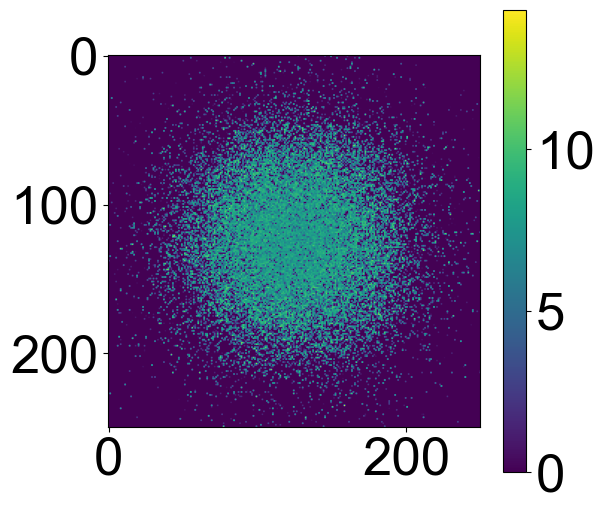

In [56]:
errorthing=GRID_std

# peaks=[]
# peaks_std=[]
# valleys=[]
# valleys_std=[]
# #Find peak indices
# xy = [124,124]
# for k in range(len(errorthing)):
#     peaks.append(np.sqrt(np.sum([errorthing[k,i,j]**2 for i in np.arange(xy[1]-1,xy[1]+2) for j in np.arange(xy[0]-1,xy[0]+2)]))/9)
#     valleysx=np.array([errorthing[k,i,j] for i in np.arange(xy[1]-9,xy[1]-6) for j in np.arange(xy[0]-7,xy[0]+7)]).flatten()
#     valleysy=np.array([errorthing[k,i,j] for i in np.arange(xy[1]-7,xy[1]+7) for j in np.arange(xy[0]-9,xy[0]-6)]).flatten()
#     valleys_both=np.array([valleysx,valleysy]).flatten()
#     valleys.append(np.sqrt(np.sum([i**2 for i in valleys_both]))/90)
# peaks=np.array(peaks)
# valleys=np.array(valleys)

# newpeakerror=peaks
# newvalleyerror=valleys

print(np.max(newpeakerror/peaks*100),np.max(newvalleyerror/valleys*100))
print(np.mean(newpeakerror/peaks*100),np.mean(newvalleyerror/valleys*100))

figure(1,figsize=(6,6))
plt.imshow(GRID_std[-1]/GRID[-1]*100)
plt.colorbar()

NameError: name 'np' is not defined